In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.special import comb
from scipy.stats import binom

import matplotlib.pyplot as plt

# Basics of probability with some numpy, pandas, and plotting.

The goal of this assignment is to re-familiarize you with the aspects of probability and statistics that are most relevant to this course. It is not a review of probability and statistics, but rather an opportunity for you to refresh on it. It is also an opportunity for you to familiarize youself with working with statistical distributions in Scipy, the primary Python package for doing so.

In this assignment, I have indicated problems that I would like you to start working on in groups during class. As discsussed inthe syllabus though, your final work on all problems must be your own. 

# Bayes and the COVID Vaccine - IN CLASS

On Nov. 18, 2020, Pfize and Bionthech released their initial efficacy data on their COVID19 vaccine (https://www.pfizer.com/news/press-release/press-release-detail/pfizer-and-biontech-conclude-phase-3-study-covid-19-vaccine). In that data, they note that out of 170 observed infections, 162 were in the placebo group while 8 were in the vaccinated group. They do not specifically note the number of participants that had received both doses and been observed longe enough to be included, but let's assume 30,000 with 15,000 in each group.

Calculate the posterior density (distribution) for the probability of being infected in each group. You may treat the data as a bionomially distributed random variable with the infection probability as a Beta distribution with $a=1, b=1$ (a uniform distribution that is). Plot the posterior density for both groups on a single axis. That is, plot the posterior distribution of p_placebo and p_vaccine where these are the probability that in the trial time window, a member of either group would become infected. Recall that the beta and binomial are conjugate priors, so the resulting probabilities follow a beta distribution. I recommend using scipy.stats as the easiest way to work with these distributions.

Additionally, plot the posterior density of the ratio of p_vaccine / p_placebo. There are many ways of doing this, but the simplest is to just sample (again, using scipy.stats) 1000 instances from the posterior distributions of p_vaccine and p_placebo respectively and plot the distribution of the ratio of the resulting samples. Note that when Pfizer notes a 95% efficacy, they are really noting that p_vaccine / p_placebo ~0.05. With the Bayesian approach however, we will be able to get a full sense of the posterior density of this ratio rather than just a single number.

[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

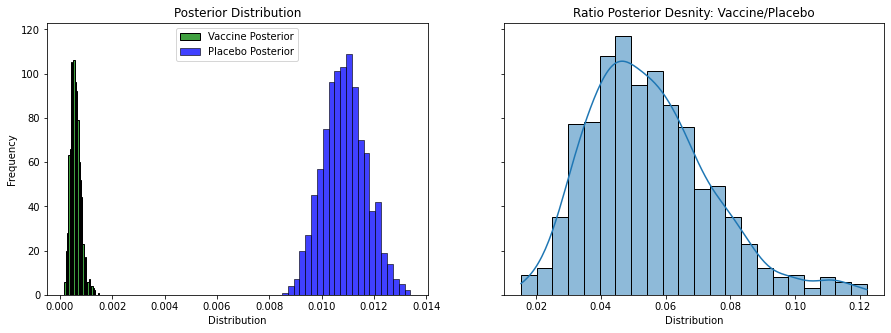

In [31]:

#integrate likelihood function over parameter
from scipy.stats import beta

n = 15000 # number of people in each group
inf_placebo = 162 #infections
inf_vaccine = 8 
samples = 1000
post_vaccine = beta.rvs(a = (1 + inf_vaccine), b = (1 + n - inf_vaccine), size = samples) # P(infected | vaccinated)
post_placebo = beta.rvs(a = (1 + inf_placebo), b = (1 + n - inf_placebo), size = samples) # P(infected | placebo)

# plot 
fig, ax = plt.subplots(1, 2, figsize = (15,5), sharey = True)
sns.histplot(post_vaccine, ax = ax[0], color = 'green', legend = True)
sns.histplot(post_placebo, ax = ax[0], color = 'blue', legend = True)
ax[0].set_title('Posterior Distribution')
ax[0].set(xlabel = 'Distribution', ylabel = 'Frequency')
ax[0].legend(labels=("Vaccine Posterior", "Placebo Posterior"))

# calculate ratio and plot
ratio = post_vaccine/post_placebo
sns.histplot(ratio,kde = True)
ax[1].set_title('Ratio Posterior Desnity: Vaccine/Placebo')
ax[1].set(xlabel = 'Distribution', ylabel = 'Frequency')



## Continuation

In the above, if you assume that the study was 1/2 the size you still find extremely strong evidence for the efficacy of this vaccine. But this is in part because the evidence is sooo strong. See for yourself, assume you have half the number of participants and 81, 4 infections respectively.

Unfortunatly most vaccines aern't this effective and a study must be designed to determine whether a minimial criterion is acceptable. The target endpoint of the Pfizer study was 170 total infections. Suppose those are distributed with 125 in the placebo group and 45 in the vaccine group (each group size still 15000). Following the same procedure above, find the probability that p_vaccine / p_placebo < 0.5 (that is, the vaccine is more than 50% effective). One easy way to do this is to: 1) find the posterior for each parameter, 2) sample 10,000 samples from each, 3) form the ratio of the samples, and 4) count the fraction of those ratios that are < 0.5. Congradulations, you just performed a Bayesian t-test on the hypothesis that ratio < 0.5.

Now, suppose instead that the study was half the size (7500 per group) with half the number of infections in each group (62 and 43 respectively). What is the probability that the vaccine is greater than 50% effective now? It should of course be lower since you have less data, but how much lower?

[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

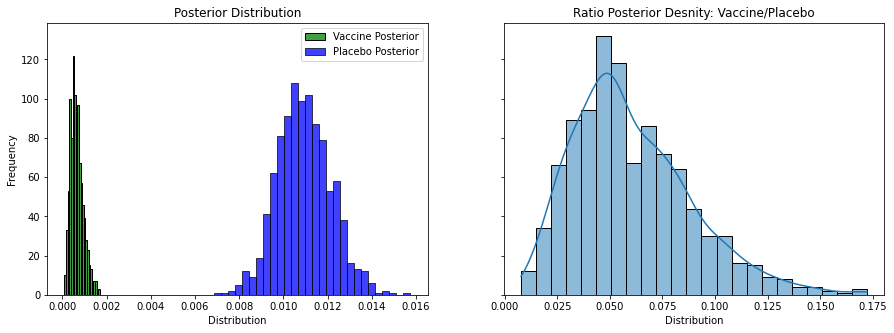

In [41]:
n = 15000/2 # number of people in each group
inf_placebo = 81 #infections
inf_vaccine = 4 
samples = 1000
post_vaccine = beta.rvs(a = (1 + inf_vaccine), b = (1 + n - inf_vaccine), size = samples) # P(infected | vaccinated)
post_placebo = beta.rvs(a = (1 + inf_placebo), b = (1 + n - inf_placebo), size = samples) # P(infected | placebo)

# plot 
fig, ax = plt.subplots(1, 2, figsize = (15,5), sharey = True)
sns.histplot(post_vaccine, ax = ax[0], color = 'green', legend = True)
sns.histplot(post_placebo, ax = ax[0], color = 'blue', legend = True)
ax[0].set_title('Posterior Distribution')
ax[0].set(xlabel = 'Distribution', ylabel = 'Frequency')
ax[0].legend(labels=("Vaccine Posterior", "Placebo Posterior"))

# calculate and plot ratio
ratio = post_vaccine/post_placebo
sns.histplot(ratio,kde = True)
ax[1].set_title('Ratio Posterior Desnity: Vaccine/Placebo')
ax[1].set(xlabel = 'Distribution', ylabel = 'Frequency')


In [33]:
def BayesTest(samples, a, b, n, inf_vaccine, inf_placebo):

    post_vaccine = beta.rvs(a = (1 + inf_vaccine), b = (1 + n - inf_vaccine), size = samples) # P(infected | vaccinated)
    post_placebo = beta.rvs(a = (1 + inf_placebo), b = (1 + n - inf_placebo), size = samples) # P(infected | placebo)


    ratio = post_vaccine/post_placebo

    # count number of ratios that are less than 0.5
    count = 0 
    for x in ratio:
        if x < 0.5:
            count += 1
        
    p = count/samples
    print(p)

In [34]:
print('125 and 45 infected: probability that p_vaccine/p_placebo < 0.5 = ')
BayesTest(10000, 1, 1, 15000, 45, 125)

125 and 45 infected: probability that p_vaccine/p_placebo < 0.5 = 
0.9728


In [35]:
print('62 and 23 infected: probability that p_vaccine/p_placebo < 0.5 = ')
BayesTest(10000, 1, 1, 7500, 23, 62)

62 and 23 infected: probability that p_vaccine/p_placebo < 0.5 = 
0.8839


Decreasing the study to half the size decreased the probability of the vaccine being more than 50% effective from 0.97 to 0.89, so a probability difference of 0.08. 

# Fun with the multinomial - IN CLASS
Consider a multinomial process where there are four potential outomes. 

1) If you draw 10 random samples from this process, you find that you have drawn event one one time ($x_1 = 1$), event two two times ($x_2 = 2$), event three three times ($x_3 = 2$), and event four five times ($x_4 = 5$). Proove that the most likely probabilities associated with this multinomial process is given by $p_i = x_i / N$. To do this, find the values of ${p_i}$ that minimize the negative log likelihood of this data. You will need to use lagrange multipliers for this since there is a constaraint on the sum of the probabilities. Calculate those probabilities for these example numbers

2) Use the minimize function from scipy.optimize to find the optimal values of these $p_i$ values (if your not familiar, look it up, ask a friend, or ask me). You'll need to define the log likelihood function, create bounds for each $p_i$ (they are probabilities after all), and you'll also need to use a constraint since the sum of the probabilities must be one. Use the SLSQP for the solver method (it is the only one that allows for constraints and bounds). Part of your job here is to figure out how to use this minimization function. Feel free to use any online resource. Your call will look something like this

results = scipy.optimize. minimize(neg_log_lik, x0 = init_parameters, 
                          method='SLSQP', bounds= bnds, constraints= cons)

Probability Mass Function for multinomial
$$f(x_1,x_2,x_3,x_4)=\frac{n!}{x_1 ! x_2 ! x_3 ! x_4!}\prod_{i=1}^4 p_i^{x_i}$$

Minimizing the negative log likelihood == maximizing log likelihood
Do this by: taking the log and and derivative with respect to $p_i$ 

$log[likelihood] = log\frac{n!}{x_1 ! x_2 ! x_3 ! x_4!}\prod_{i=1}^4 p_i^{x_i}$

$log[likelihood] = log\frac{n!}{x_1 ! x_2 ! x_3 ! x_4!} + \sum_{i=1}^4 log[p_i^{x_i}]$

$log[likelihood] = log\frac{n!}{x_1 ! x_2 ! x_3 ! x_4!} + \sum_{i=1}^4 x_i log[p_i]$


$ \frac {\partial log[likelihood]}{\partial p_j} = \frac{\partial}{\partial p_j} log\frac{n!}{x_1 ! x_2 ! x_3 ! x_4!} + \sum_{i=1}^4 x_i log[p_i]$

$ = x_j \frac{\partial}{\partial p_j} log(p_j) = x_j \frac{1}{p_j}$

There is a constraint on the sum of the probabilities equalling 1.


Using lagrange multipliers
$L = x_j \frac{1}{p_j} + \lambda(1-\sum_{i=1}^4 p_i)$

Now, take the derivative of L wrt to $p_j$ and wrt to $\lambda$ to get a system of equations:
$\frac{\partial L}{\partial p_j} = 0 = x_j \frac{\partial}{\partial p_j} + \frac{\partial}{\partial p_j}(\lambda(1-\sum_{i=1}^4 p_i))$

$ 0 = x_j \frac{\partial}{\partial p_j} + \lambda (-1) $

Solve for $p_j$:

$p_j = \frac{x_j}{\lambda}$

Now wrt to $\lambda$:

$ 0 = \frac{\partial}{\partial \lambda}[log[likelihood] + (\lambda(1-\sum_{i=1}^4 p_i)))$

$ = 1 - \sum_{i=1}^4 p_i  $

$ 1 = \sum_{i=1}^4\frac{xi}{\lambda}$ 

$ \lambda  = \sum_{i=1}^4 x_i $

$ \lambda  = x_1 + x_2 + x_3 + x_4 $


So this gives us the probabilities: 

$ p_j = \frac {x_j}  {x_1 + x_2 + x_3 + x_4} $

$p_1 = \frac{1}{10} = 0.1 $

$p_1 = \frac{2}{10} = 0.2 $

$p_1 = \frac{2}{10} = 0.2 $

$p_1 = \frac{5}{10} = 0.5 $




In [16]:
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

# negative log likelihood 
def getNegLogLik(x, p_i):
    constant = np.log(np.math.factorial(4))/(np.math.factorial(1)*np.math.factorial(2)*np.math.factorial(2)*np.math.factorial(5))
    neg_log_lik = -constant - np.sum(x*np.log(p_i))
    return neg_log_lik
    

# define bounds, constraints, initial parameters
                                         
# bounds: p goes from 0 to 1
zero_sub = 10**-10 # to prevent divide by zero
bnds = Bounds([zero_sub, zero_sub, zero_sub, zero_sub],[1,1,1,1])

# constraints: sum must be less than 1
cons = LinearConstraint([1, 1, 1, 1,], [1], [1]) # add up to 1, min and max = 1

# initial parameters
x = [1,2,2,5] # x parameters
init_parameters = [0.25, 0.25, 0.25, 0.25] # all equal probabilities for initial guess


# minimize
results = minimize(lambda p_i: getNegLogLik(x,p_i) , x0 = init_parameters, method='SLSQP', bounds= bnds, constraints= cons)
print(results)
print('optimal p values: 0.1, 0.199, 0.199, 0.499')

     fun: 12.199451710093633
     jac: array([ -9.99865663, -10.00017869, -10.00017333, -10.00012732])
 message: 'Optimization terminated successfully'
    nfev: 59
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.10001343, 0.19999642, 0.19999653, 0.49999363])
optimal p values: 0.1, 0.199, 0.199, 0.499


# MLE and MPE and the roles of data and the prior. - IN CLASS

Maximum a Posteriori Estimation integrates prior knowledge with data to provide an estimate of some underlying quantity. However, as more data becomes avaliable, it should (in theory) carry more weight so that prior knowledge becomes less influential with more data. This is indeed the case. Let's illustrate this through an example. 

Suppose a young chess player has won 7 out of 10 of their matches (we're assuming no ties for this example). We would like to make a guess at the probability that they will win a future match. Lets treat this as a binomial process and assume that our prior knowledge is that the average player will win about 50% of their matches over a career (someone has to lose, neglecting ties again). What is their expected win percentage going forward based on this information. Assume that the prior on the win percentage is a beta distribution that is pretty tight around 0.5 (since most people are average) with a=4, b=4. This is considered to be a highly informative prior. This problem can be solved either analytically or numerically, either is fine.

1) Calculate their expected win percentage using MLE.

2) Calculate their expected win percentage using MPE with the stated prior.

3) Lets assume that instead they continuted to play and had a win percentage of 14/20. Calcualate their expected win percentage with MPE again. And again with a 28/40 win rate.

4) What do you observe about the tendency of the MPE related to the MLE?

5) Let's go back to the 7/10 data. Assume instead that we use an uninformative prior Beta(1,1) instead. How does that change the estimate?

6) What can you conclude? How does the presence of an informative or uninformative prior influence estimates. How does having little versus a lot of data influence things? 

There is more than one way to calculate these p_MAP estimates. Any valid method is ok. But some are easier than others. Your choice!

In [36]:
#1) 
# MLE = uniform prior
k = 7
n = 10
q = k/n
print('1) Expected win percentage MLE: ', q)


# 2)

print('2) Expected win percentage using MPE with the state prior:')


1) Expected win percentage MLE:  0.7
2) Expected win percentage using MPE with the state prior:


The beta distribution is given by: 
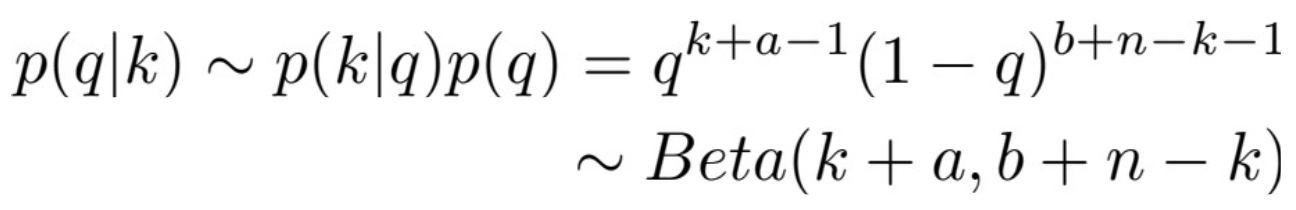
Taking the log of posterior: 

$log[P(q|k)] \sim  log[ q^{\alpha+k-1} (1-q)^{\beta +b - k -1} ]$

$=  log[ q^{\alpha+k-1} ] + log [(1-q)^{\beta +b - k -1} ]$
     
$= (\alpha + k -1) log[q] + (\beta + n -k -1) log[1-q]$
       
To get MPE, take derivative and set to zero:
$ 0 = \frac{d log[P(q|k)] }{dq} \sim \frac{d}{dq} [(\alpha + k -1) log[q] + (\beta +n - k -1) log[1-q]]$

Following log rules -> solve for q and get:

$ q = \frac{\alpha + k -1}{\alpha + n - 2}$\

prior = 7 out of 10 matches
$\alpha = \beta = 4; k = 7; n = 10$\
$ q = \frac{4+7-1}{4+4+10-2} = \frac{10}{16} = 0.625$


3) 14/20 win percentage and 28/40 win percentage
Solving for these win percentages:

$ q = \frac{\alpha + k -1}{\alpha + \beta + n - 2}$

prior = 14 out of 20 matches
$\alpha = \beta = 4; k = 14; n = 20$

$ q = \frac{4+14-1}{4+4+20-2} = \frac{17}{26} = 0.654$


prior = 28 out of 40 matches
$\alpha = \beta = 4; k = 28; n = 40$\
$ q = \frac{4+28-1}{4+4+40-2} = \frac{31}{46} = 0.673$

4) In general, as the number of games increases MPE approaches MLE

5) Changing $\alpha$ and $\beta$ to 1 results in:

$ q = \frac{1 + 7 -1}{1 + 1 + n - 2} = \frac{7}{10}$

When this uniform distribution is used the maximized probability is equal to the probability from the MLE method


6) With sufficient data, the probability from MPE and MLE are roughly equal. Having a more informative prior gives a better win estimation rather than the overestimate of the MLE method. But with more games/samples, the MLE provides a good estimate without knowing a prior.

# Conditional Probability - Homework

Task 1: Assume that E and F are two events with positive probabilities. Show that if P(E|F) = P(E), then P(F|E) = P(F). Show this analytically. It is a simple proof, so just use latex in markup cell to show your work.

Task 2: Prove that for any three events A,B,C, each having strictly positive probability with the property that $P(A \cap B) > 0$, $P(A \cap B \cap C) = P(A) P(B|A) P(C|A \cap B)$. It is a simple proof, so just use latex in markup cell to show your work.

Task 3: A die is rolled twice. 1) What is the probability that the sum of the two rolls is greater than 7? 2) What is the probability that the sum of the two rolls is greater than 7 given that the first roll was a 4? Calculate these both using pen and paper and through a dice rolling experiment

*******************
Task 1:
$P(F|E) = (P(E|F) * P(F)) / P(E)$ from Bayes Rule
Given $P(E|F) = P(E)$, substitute in to equation which gives
$P(F|E) = (P(E) * P(F)) / P(E)$
Simplify
$P(F|E) = P(F)$

Task 2:
We can expand $P(A ∩ B ∩ C)$:

$P(A ∩ B ∩ C)=P(A ∩ (B ∩ C))$

Then from Bayes rule:
$= P(A)P(B ∩ C|A)$ 

Expanding this out we get:
$P(B ∩ C|A)= P(B|A)P(C|A ∩ B)$

Substituting into the original equation, we get: 

$P(A ∩ B ∩ C)=P(A)P(B|A)P(C|A ∩ B)$

Task 3: 
1) 
P(sum of 2 rolls is greater than 7) =  P(2 and 6) + P(3 and 5) + P(3 and 6) + P(4 and 4) + P(4 and 5) + P(4 and 6) +
P(5 and 3) + P(5 and 4) + P(5 and 5) + P(5 and 6) + P(6 and 2) + P(6 and 3) + P(6 and 4) + P(6 and 5) + P(6 and 6)
each probability is 1/6 * 1/6 so 
P(sum of 2 rolls is greater than 7) = (1/36) * 15 = 0.4167

2)
P(sum of 2 rolls is greater than 7 ∩ first roll is a 4) = P(4 and 4) + P(4 and 5) + P(4 and 6) = 3 * (1/36) = 0.0833
P(first roll is a 4) = 1/6
P(sum of 2 rolls is greater than 7 ∩ first roll is a 4) / P(first roll is a 4) = .0833 / 0.167 = 0.5 or 1/2.


# Revisiting the law of large numbers. - Homework

Sometimes the law of large numbers is mis-interpreted or mis-stated to say that every probabilistic process begins to look normally distributed with enough samples. This is of course not true. Rather, it says that the sample mean of a probabilistic process is approximately normally distributed if appropriate conditions are met (we're not going to get into the details). Let's just look at this quickly. Consider the exponential distribution (use scipy.stats). Generate a 100 samples from this distribution with a $\lambda = 3$ and plot a histogram of the resulting distribution. Do the same for 200 samples and again for 1000 samples. 

Now, generate 1,000 independent sets of samples with 100 samples each. For each set of 100 samples compute the sample mean. Now plot a histogram (or kernel density estimate plot) of those 1,000 sample means. What is normally distributed?

Text(0.5, 1.0, '1000 Samples')

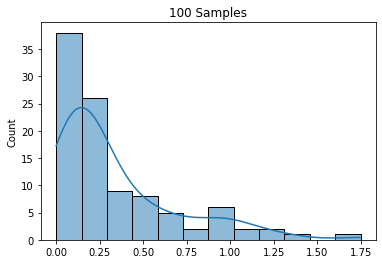

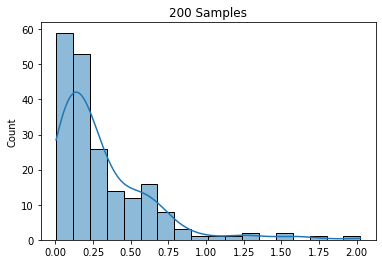

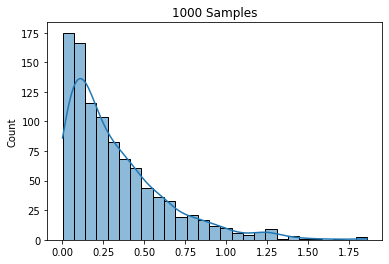

In [37]:
from scipy.stats import expon
lamb = 3

# 100 samples
fig, ax = plt.subplots(1, 1)
r = expon.rvs(scale = 1/lamb, size=100)
sns.histplot(r, kde=True)
ax.set_title('100 Samples')

# 200 samples
fig, ax = plt.subplots(1, 1)
r = expon.rvs(scale = 1/lamb, size=200)
sns.histplot(r, kde=True)
ax.set_title('200 Samples')

# 1000 samples
fig, ax = plt.subplots(1, 1)
r = expon.rvs(scale = 1/lamb, size=1000)
sns.histplot(r, kde=True)
ax.set_title('1000 Samples')


The sample mean becomes normally distributed with lots of samples.


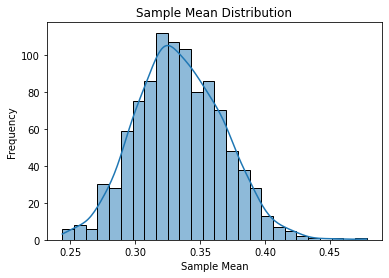

In [40]:
# 1000 independent sets of samples with 100 samples each
from scipy.stats import expon
fig, ax = plt.subplots()

lamb = 3
avgs = [] # array to hold sample means

for i in range(1000):
    sample = expon.rvs(scale = 1/lamb, loc = 0, size = 100)
    avgs.append(sample.mean())

sns.histplot(avgs, kde = True)
ax.set_title('Sample Mean Distribution')
ax.set(xlabel='Sample Mean', ylabel = 'Frequency')
print('The sample mean becomes normally distributed with lots of samples.')

# Playing with Binomials - Homework
Consider the sample of data $S = \{1,1,0,1,0\}$ created by flipping a coin $x$ five times, where 0 indicates a heads and 1 indicates a tails.

Task 1: What are the sample mean and sample standard deviation of this data?

Task 2: If this were a fair coin with $P_{heads} = 0.5$, what would the probability of observing this number of heads be.

Task 3: Use "grid computing" to numerically find the $P_{heads}$ that maximizes the likelihood of this data. That is, choose $N$ equally spaced probability values in the interval $[0,1]$. For each value of $P_{heads}$, calculate the likelihood $L(Data | P_{Heads})$. Plot the resulting likelihoods as a function of $P_{Heads}$. What value of $P_{Heads}$ maximizes the likelihood?

Task 4: The previous problem can of course be solved analytically as well. What value of $P_{heads}$ would maximize the likelelihood of observing this data. Prove using probability maximization (i.e. calculus) that if the coin is flipped $N$ times with $r$ heads, the value of $P_{heads}$ that maximizes the probability of observing those $r$ heads is $P_{heads} = r/N$. You can either prove this in the cell below using Latex in Jupyter (preferred), or turn in a separate pdf. 



Task 1:
sample mean:  0.6
sample standard deviation:  0.48989794855663565
Task 2:
probability of observing 2 heads:  0.03125
Task 3:
0.3455413650590289 is the max likelihood which occurs at 
probability  =  0.595959595959596


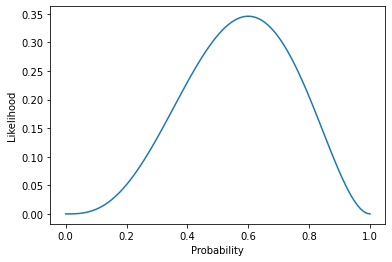

In [53]:
# 0 = heads, 1 = tails
S = np.array([1, 1, 0, 1, 0]) #sample data

# Task 1: What are the sample mean and sample standard deviation of this data
mean = np.mean(S)
standard_dev = np.std(S)
print("Task 1:")
print("sample mean: ", mean)
print("sample standard deviation: ", standard_dev)

# Task 2: If this were a fair coin, what is the probability of 
# observing this number of heads?
p_heads = 0.5
p_tails = 0.5
p_2heads = (p_heads**2) * (p_tails**3)
print("Task 2:")
print("probability of observing 2 heads: ", p_2heads)

# Task 3: Use grid computing to numerically find P_heads that maximizes the 
# likelihood of the data
print("Task 3:")
N = 100
p = np.linspace(0, 1, N)
k = 3
n = 5

vals = []
lik = lambda k,n,q : (np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k))) * q**k * (1-q) ** (n-k)           
vals = lik(k,n,p)
maxVal=(max(vals))
print(maxVal, 'is the max likelihood which occurs at ')

for i in range(len(vals)):
    if vals[i] == maxVal:
        print('probability  = ', p[i])


fig = plt.figure()
ax = plt.subplot()
ax.plot(p,lik(k,n,p))
ax.set_xlabel('Probability')
ax.set_ylabel('Likelihood')
plt.show()


Task 4:

So we need to prove that $P(k\mbox{ out of } n | q) = \binom{n}q^k(1-q)^{(n-k)}$
is equivalent to $q = \frac{k}{n}$
Following the steps from the notes,
$P(k\mbox{ out of } n | q) = \binom{n}{k}q^k(1-q)^{(n-k)}$
Taking the log and then rearranging with log rules...
$L(q|k) = log[\binom{n}{k}] + k log[q] + (n-k) log[1 - q]$
$L(q|k) = log[\frac{n!}{k!(n-k)!}] + k log[q] + (n-k) log[1 - q]$

Taking derivative with respect to $q$

$\frac{\partial L(q|k)}{\partial q} = \frac{\partial}{\partial q}$
$\bigg(log\bigg[\frac{n!}{k!(n-k)!}\bigg] + k log[q] + (n-k) log[1-q]\bigg) = k \frac{1}{q} - (n-k)\frac{1}{1-q}$

Now, set to equal to zero and solve for q
$k \frac{1}{q} = (n-k)\frac{1}{1-q}$
$k - kq = nq - kq$
$k = nq$
$q = \frac{k}{n}$

The coin is flipped $N$ times with $r$ heads, so we get 
$q = \frac{r}{N}$

With our example withset $S$, $q = \frac{3}{5} = 0.6$

# Joint and marginal distribution visualization for a Gaussian Mixture model - Homework

Here we're going to just take a quick at the difference between joint and marginal distributions. Use scipy.stats.multivariate_normal to create and visualize a multimodal distribution. Specifically, create an equally weighted sum of the following two 2D multivariate normals through sampling. The first normal has mean = [0.5, -0.2] with covariance matrix = [[2.0, 0.3], [0.3, 0.25]]. The second has mean = [-4, 1] and covariance = [[1.0, 0.3], [0.3, 0.25]]. Create an equally weighted sum of these two distributions by sampling 300 samples from each and combining them into a single data set. Now, construct a Pandas dataframe from these 600 2D points and use the "seaborn" plotting function "jointplot" to visualize the joint and conditional distributions of these two variables. Use both the "kind = scatter" and "kind = kde" options where "kde" refers to the kernal density estimate.

Now, do the same thing but instead create an unequal weighting where you draw 200 samples from the first and 400 from the second. Create the same plot. And do again with a 100 / 500 sample split.

Text(0.5, 0.98, '300 samples each group')

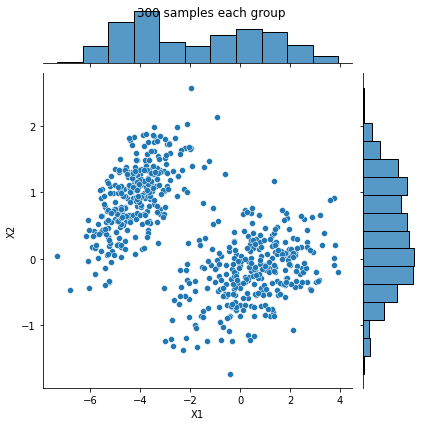

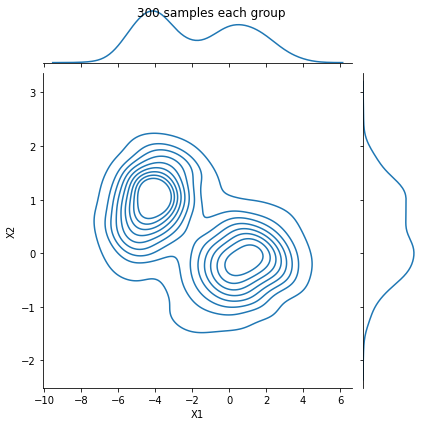

In [21]:
from scipy.stats import multivariate_normal

# Create an equally weighted sum of these two distributions by sampling 300 samples from each and combining them into a dataset
rv1 = multivariate_normal.rvs(mean = [0.5, -0.2], cov = [[2.0, 0.3], [0.3, 0.25]], size = 300)
rv2 = multivariate_normal.rvs(mean = [-4, 1], cov = [[1.0, 0.3], [0.3, 0.25]], size = 300)


# combine and put into dataframe
my_list = np.append(rv1, rv2, axis = 0)
df = pd.DataFrame(data=my_list, columns=['X1', 'X2'])
#print(df)

# plot
p = sns.jointplot(data=df, x = 'X1', y = 'X2', kind = "scatter")
p.fig.suptitle("300 samples each group")
p = sns.jointplot(data=df,  x = 'X1', y = 'X2', kind = "kde")
p.fig.suptitle("300 samples each group")

Text(0.5, 0.98, '200 samples, 400 samples')

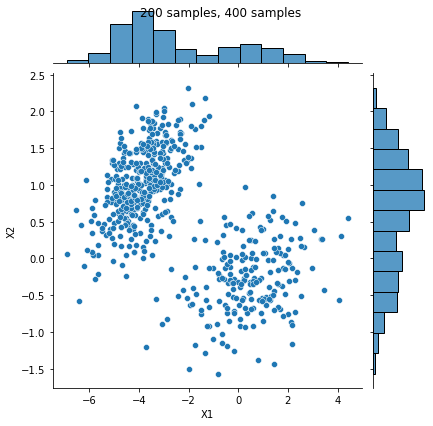

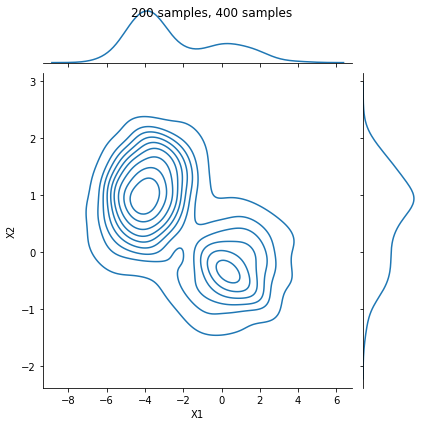

In [22]:
from scipy.stats import multivariate_normal
# Create an equally weighted sum of these two distributions by sampling 200, 400 and combining them into a dataset
rv1 = multivariate_normal.rvs(mean = [0.5, -0.2], cov = [[2.0, 0.3], [0.3, 0.25]], size = 200)
rv2 = multivariate_normal.rvs(mean = [-4, 1], cov = [[1.0, 0.3], [0.3, 0.25]], size = 400)

# combine and put into dataframe
my_list = np.append(rv1, rv2, axis = 0)
df = pd.DataFrame(data=my_list, columns=['X1', 'X2'])

p = sns.jointplot(data=df, x = 'X1', y = 'X2', kind = "scatter")
p.fig.suptitle("200 samples, 400 samples")
p = sns.jointplot(data=df,  x = 'X1', y = 'X2', kind = "kde")
p.fig.suptitle("200 samples, 400 samples")


Text(0.5, 0.98, '100 samples, 500 samples')

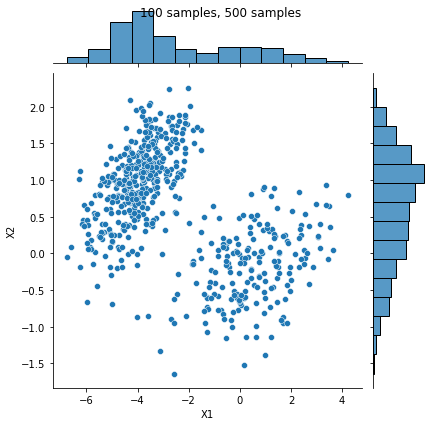

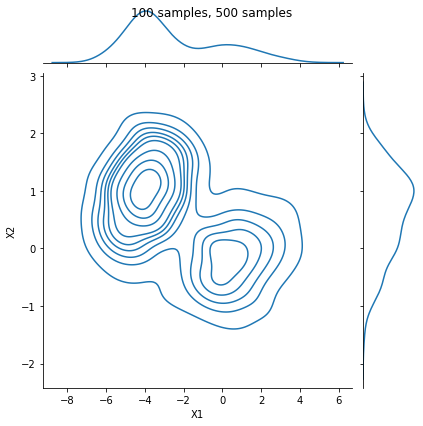

In [23]:
from scipy.stats import multivariate_normal
# Create an equally weighted sum of these two distributions by sampling 100, 500 and combining them into a dataset
rv1 = multivariate_normal.rvs(mean = [0.5, -0.2], cov = [[2.0, 0.3], [0.3, 0.25]], size = 200)
rv2 = multivariate_normal.rvs(mean = [-4, 1], cov = [[1.0, 0.3], [0.3, 0.25]], size = 400)

# combine and put into dataframe
my_list = np.append(rv1, rv2, axis = 0)
df = pd.DataFrame(data=my_list, columns=['X1', 'X2'])

p = sns.jointplot(data=df, x = 'X1', y = 'X2', kind = "scatter")
p.fig.suptitle("100 samples, 500 samples")
p = sns.jointplot(data=df,  x = 'X1', y = 'X2', kind = "kde")
p.fig.suptitle("100 samples, 500 samples")

# Calculating conditionals with Bayes and Monte Carlo Sampling - Homework
Now lets have a little fun with Bayes theorem. Consider the following contrived but painfully fun experiment. Suppose you have two coins. One is loaded so that 80% of the time it comes up heads while the other is fair. You also have two six sided dice. One is fair (1/6 chance for each number 1-6) and the other is loaded so that a "1" comes up with probability 3/8 while 2-6 have a 1/8 chance each. You first choose one of these coins at random (with equal chance) and flip it. If a heads comes up, you roll the fair dice. If a tails comes up, you roll the loaded dice. Suppose I choose a coin, flip it, and roll the dice accordingly and find a 2. What is the probability that I originally chose the fair dice? Calculate this probability both using Bayes rule directly and by simulating this random process 10,000 times (Monte Carlo simulation that is) and counting the fraction of outcomes resulting in a 2 that come from the fair dice. Your answers should of course be the same (within a percent or two)!

Hint: It might help to draw a picture of what is going on.

In [24]:
# Bayes rule
# P(2 | fair dice) = P(2 ∩ fair dice)/P(fair dice)

#P(2 ∩ fair dice) = P(2 ∩ fair dice ∩ fair coin) + P(2 ∩ fair dice ∩ loaded coin) 
p_2andFD = 0.5*0.8*(1/6) + 0.5*0.5*(1/6)
#P(fair dice) = P(fair coin ∩ fair dice/heads) + P(loaded coin ∩ fair dice/heads)
p_FD = 0.5*0.5 + 0.5*0.8
p_2givenFD = p_2andFD/p_FD
print('Bayes Rule: ')
print('P(2 | fair dice) = P(2 ∩ fair dice)/P(fair dice)')
print('P(2 ∩ fair dice) = P(2 ∩ fair dice ∩ fair coin) + P(2 ∩ fair dice ∩ loaded coin) = 0.5*0.5*(1/6) + 0.5*0.5*(1/6)')
print('P(fair dice) = P(fair coin ∩ fair dice/heads) + P(loaded coin ∩ fair dice/heads) = 0.5*0.5 + 0.5*0.8')
print('P(2 | fair dice) = ', p_2givenFD)

# Monte Carlo simulation
from scipy.stats import rv_discrete
outcomes = []

# Loaded die distribution
x_LD = (1, 2, 3, 4, 5, 6)
p_LD = (3/8, 1/8, 1/8, 1/8, 1/8, 1/8)
dist_LD = rv_discrete(values=(x_LD, p_LD))
# fig, ax = plt.subplots(1, 1)
# ax.plot(x_LD, dist_LD.pmf(x_LD), 'ro', lw=2)

# Fair die distribution
x_FD = (1, 2, 3, 4, 5, 6)
p_FD = (1/6, 1/6, 1/6, 1/6, 1/6, 1/6)
dist_FD = rv_discrete(values=(x_FD, p_FD))
# fig, ax = plt.subplots(1, 1)
# ax.plot(x_FD, dist_FD.pmf(x_FD), 'ro', lw=2)

# Loaded coin distribution
x_LC = (0, 1)
p_LC = (0.8, 0.2)
dist_LC = rv_discrete(values=(x_LC, p_LC))
# fig, ax = plt.subplots(1, 1)
# ax.plot(x_LC, dist_LC.pmf(x_LC), 'ro', lw=2)

# Fair coin distribution
x_FC = (0, 1)
p_FC = (0.5, 0.5)
dist_FC = rv_discrete(values=(x_FC, p_FC))
# fig, ax = plt.subplots(1, 1)
# ax.plot(x_FC, dist_FC.pmf(x_FC), 'ro', lw=2)


# Events: choose coin, coin flip, roll die
N = 10000
count = 0
outcomes_FD = 0 
# CHOOSE COIN
for i in range(N):
    x1 = dist_FC.rvs(size = 1) # x1 = outcome of choosing coin, 50/50 chance so can use fair coin distribution

    # if 0 -> fair coin, if 1 -> loaded coin
    if x1 == 0: # fair coin
        x2 = dist_FC.rvs(size = 1) # x2 = outcome of coin toss, H(0) or T(1)
    else: # loaded coin
        x2 = dist_LC.rvs(size = 1)
    
    
    if x2 == 0: # Heads -> fair dice
        x3 = dist_FD.rvs(size = 1) # x3 = outcome of dice roll
        outcomes_FD += 1 # count number of times fair dice is used
        if x3 == 2:
            count += 1 # count number of 2's that result from fair dice
    else: # Tails -> loaded dice
        x3 = dist_FD.rvs(size = 1)
    
    
    outcomes = np.append(outcomes, x3) # results of ALL outcomes
    
    
    
#fig, ax = plt.subplots(1, 1)
#sns.histplot(outcomes)
print('Monte Carlo: ')
print('Probability of a 2 from fair dice: ', count/outcomes_FD)


Bayes Rule: 
P(2 | fair dice) = P(2 ∩ fair dice)/P(fair dice)
P(2 ∩ fair dice) = P(2 ∩ fair dice ∩ fair coin) + P(2 ∩ fair dice ∩ loaded coin) = 0.5*0.5*(1/6) + 0.5*0.5*(1/6)
P(fair dice) = P(fair coin ∩ fair dice/heads) + P(loaded coin ∩ fair dice/heads) = 0.5*0.5 + 0.5*0.8
P(2 | fair dice) =  0.16666666666666666
Monte Carlo: 
Probability of a 2 from fair dice:  0.16939216291268128


# Bayes and galaxies - Homework.

Suppose you image 10 galaxies and find that 4 are spiral galaxies? What is the ratio of spiral galaxies in the universe? You would of course say 40%, but you have a pretty small sample size. How confident are you in this? How does your prior expectation influence this?

This problem follows a similar procedure to the Covid - Bayes problem.

1) Given the data above, plot your posterior distribution assuming a uniform prior on this proportion.

2) Lets look at the effect of prior knowledge. Suppse you have a pretty good idea that 70% of galaxies will be spiral. With the data above, how does your posterior distribution change if you incorporate this prior knowledge? Plot your prior and posterior on the same graph. Be careful about how you choose your prior here.

3) As a follow up to (2), lets see what happens when you have way more data. Assume of 100 galaxies, 40 are spiral. Assuming a prior belief that 70% are spiral (using the same prior distribution of 2), what is the posterior now? Plot it.

This problem should help illustrate the relationship between data, the prior, and the posterior.

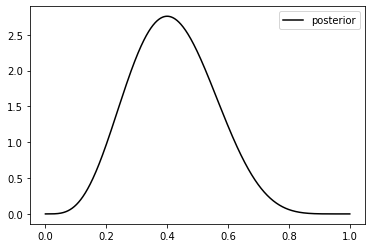

In [25]:
# 1) plot posterior distribution assuming a uniform prior on the proportion
from scipy.stats import beta
num_spirals = 4
n = 10
p_max = 1
p_min = 0
num_p = 1000
p = np.linspace(p_min, p_max, num_p)
posterior_spiral = beta.pdf(p, a = (1 + num_spirals), b = (1 + n - num_spirals)) # posterior with uniform prior (alpha,beta = 1)
plt.figure(1) 
plt.plot(p, posterior_spiral, color = 'black', label = 'posterior')
plt.legend()
plt.show()

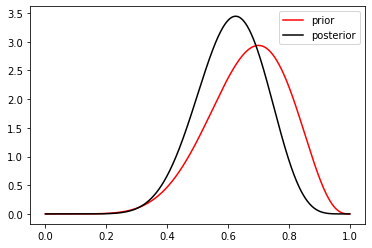

In [26]:
# 2) how does the posterior distribution change if you incorporate this prior knowledge
plt.figure(2) 
k = 7
n = 10
p_max = 1
p_min = 0
num_p = 1000
p = np.linspace(p_min, p_max, num_p)
prior_spiral = beta.pdf(p, a = 1 + k, b = 1 + n - k) # alpha and beta = 1, prior for 70% spiral
posterior_spiral = beta.pdf(p, a = (4 + k), b = (4 + n - k)) # posterior based on 4 
plt.plot(p, prior_spiral, color = 'red', label = 'prior')
plt.plot(p, posterior_spiral, color = 'black', label = 'posterior')
plt.legend()
plt.show()


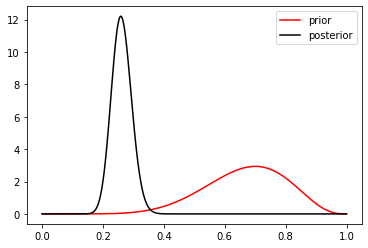

In [28]:
# 3) more data, 100 galaxies, 40 spiral
spiral = 40
galaxies = 100
num_spirals = 4
k = 7
n = 10
p_max = 1
p_min = 0
num_p = 1000
p = np.linspace(p_min, p_max, num_p)
prior_spiral = beta.pdf(p, a = 1 + k, b = 1 + n - k) # prior of 70% spiral
posterior_spiral = beta.pdf(p, a = (40 + 7), b = (40 + 100 - k)) # posterior influenced by new data
plt.plot(p, prior_spiral, color = 'red', label = 'prior')
plt.plot(p, posterior_spiral, color = 'black', label = 'posterior')
plt.legend()
plt.show()

# Metacognition questions.

Briefly answer these two questions. A few sentences or more is sufficient on each.

1) What did you learn as part of this assignment (hopefully something)?

2) What questions do you still have or is there something you still don't grasp? 

If you understand everything, already knew all of this, did not learn anything new, and don't have any questions, great! Instead of answering the above questions, instead write me a new question (with full solutions) that you think would help illustrate one or more of the points above.

****************
1) From this assignment, I learned how a prior distribution affects a posterior distribution, how to find MLE and MPE, how to code a Monte Carlo simulation, how to use scipy.stats and the various functions involved, and probably some more things as well.


2) Some of the terminology and concepts are still hard for me, such as the different probability distributions (posterior, beta, etc) and equations.